In [12]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns   

## Data Loading

In [13]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [16]:
df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = (df['Time']).dt.hour

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

## Mathematical Calculation and Analysis

In [18]:
yangon = df[
    (df['City'] == 'Yangon')
]

In [19]:
x = yangon['gross income'] #Memanggil column Amount dan menyimpan dalam variable x
mean = np.mean(x) #Mencari mean dalam variable x
median = np.median(x) #Mencari median dalam variable x
modus = statistics.mode(x) #Mencari mode dalam variable x menggunakan library statistics

print(f'Nilai Mean dari gross income:', mean)
print(f'Nilai Median dari gross income:', median)
print(f'Nilai Modus dari gross income:', modus)

Nilai Mean dari gross income: 14.87400147058824
Nilai Median dari gross income: 11.468
Nilai Modus dari gross income: 10.326


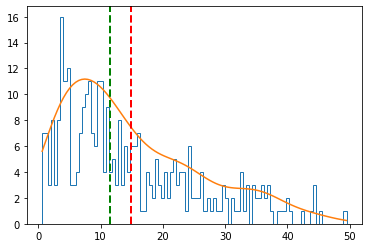

In [20]:
#Visualization data Amount masih memiliki Outlier
w_outlier = yangon['gross income']
density = stats.gaussian_kde(w_outlier)
n, x, _ = plt.hist(w_outlier, histtype='step', bins=100)
plt.plot(x, density(x)*2**8)
plt.axvline(w_outlier.mean(),color='red', linestyle='dashed', linewidth=2)
plt.axvline(w_outlier.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [21]:
#Mencari Outlier

find_outlier = yangon['gross income']
Q1 = np.quantile(find_outlier, 0.25) #Mencari Quartile satu dengan menggunakan persamaan quantile 0.25
Q3 = np.quantile(find_outlier, 0.75) #Mencari Quartile satu dengan menggunakan persamaan quantile 0.75
print(f'Nilai Q1 adalah', Q1)
print(f'Nilai Q3 adalah', Q3)
iqr = Q3-Q1 #Mencari Inter Quartile Range dengan rumus Q3 - Q1
print(f'Nilai IQR adalah', iqr)

Nilai Q1 adalah 6.547124999999999
Nilai Q3 adalah 21.873375000000003
Nilai IQR adalah 15.326250000000003


In [22]:
lower = Q1-1.5*iqr #Mencari batas bawah
upper = Q3+1.5*iqr #Mencari batas atas
print(f'Nilai lower adalah', lower)
print(f'Nilai upper adalah', upper)

Nilai lower adalah -16.44225000000001
Nilai upper adalah 44.862750000000005


In [23]:
outliers = find_outlier [(find_outlier<lower) | (find_outlier>upper)]
print(outliers)

167    49.490
429    45.325
Name: gross income, dtype: float64


In [24]:
no_outliers = find_outlier [(find_outlier>lower) & (find_outlier<upper)]
print(no_outliers)

0      26.1415
2      16.2155
3      23.2880
4      30.2085
6      20.6520
        ...   
990    14.1400
992     5.8030
997     1.5920
998     3.2910
999    30.9190
Name: gross income, Length: 338, dtype: float64


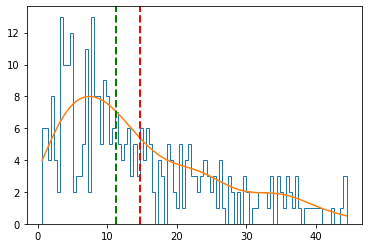

In [25]:
# Central Tendency setelah Outlier dihapus dari data
no_outliers
density = stats.gaussian_kde(no_outliers)
n, x, _ = plt.hist(no_outliers, histtype='step', bins=100)
plt.plot(x, density(x)*2**7.5)
plt.axvline(no_outliers.mean(),color='red', linestyle='dashed', linewidth=2)
plt.axvline(no_outliers.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

## Hyphotesis Testing

In [26]:
mean_pop = yangon['gross income'].mean()
mean_pop

14.87400147058824

In [30]:
X = yangon['gross income']

In [31]:
t_stat, p_val = stats.ttest_1samp(df['gross income'], 14.874)
print(f'P-value:', p_val)
print(f't-statistics:', t_stat)

P-value: 0.1725972981339494
t-statistics: 1.36488249947451


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


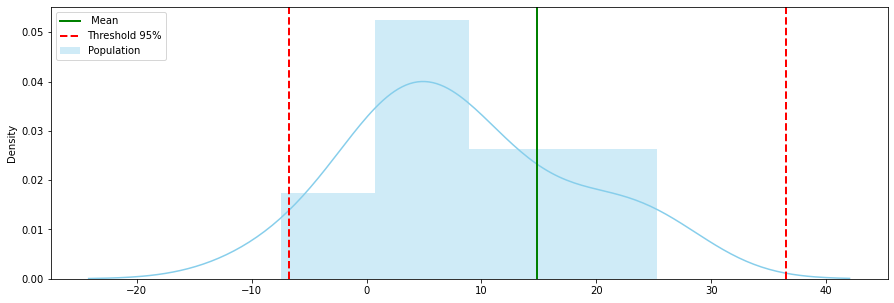

In [32]:
no_outliers_pop = np.random.normal(X.mean(), X.std(), 14)


ci = stats.norm.interval(0.95, X.mean(), X.std())

plt.figure(figsize=(15,5))
sns.distplot(no_outliers_pop, label='Population', color='skyblue')
plt.axvline(X.mean(), color='green', label=' Mean', linewidth=2)

plt.axvline(ci[1], color='red', label='Threshold 95%', linewidth=2, linestyle='dashed')
plt.axvline(ci[0], color='red', linewidth=2, linestyle='dashed')

plt.legend()

In [ ]:
yangon = df[(df['City'] == 'Yangon')]

In [ ]:
import PIL
print('PIL',PIL.__version__)


PIL 8.4.0
